# Objective

# Predict the medical insurance cost for individuals based on their demographic and health-related information.

## Dataset Overview:
 # The dataset includes the following features:
 # 1.Age
 # 2.Sex
 # 3.BMI (Body Mass Index)
 # 4.Number of children
 # 5.Smoker (yes/no)
 # 6.Region
 # 7.Charges (target variable)
  
  ## Workflow
  # ->Import required librariesimport pandas as pd 
  # ->Load and explore the dataset
  # ->Preprocess the data (encoding, scaling)
  # ->Train regression models
  # ->Evaluate model performance -->
  ## conclusion
  

In [2]:
#Load the import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
# Load dataset
df = pd.read_csv("Medical_Insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
#Display the Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Load the few rows 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis (EDA)
# Summary statistics

In [7]:
#Statistics
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [8]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


 ## Distribution of Charges

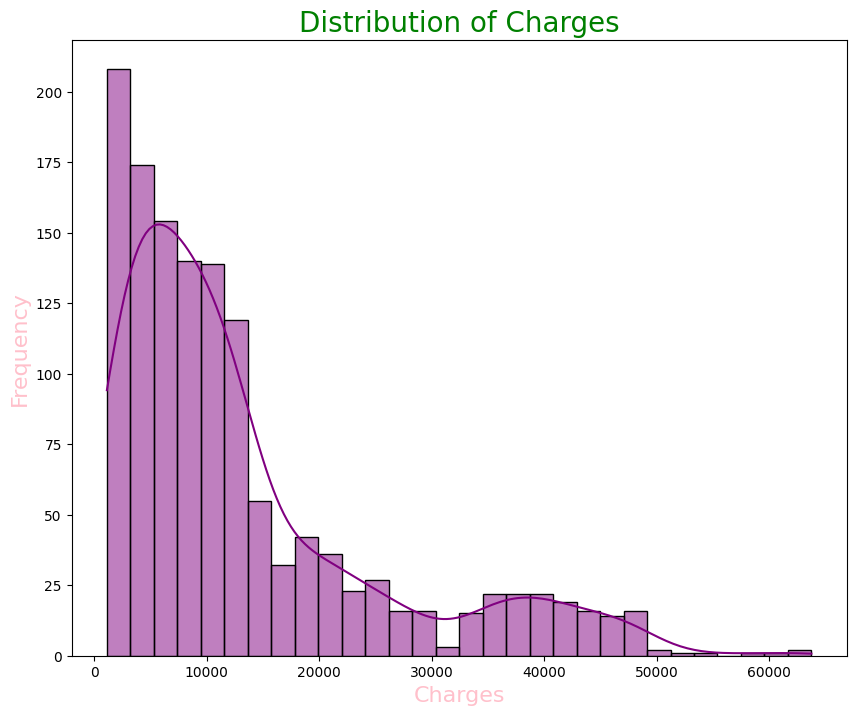

In [9]:
# Visualize charges distribution
plt.figure(figsize=(10, 8))
sns.histplot(df['charges'], kde=True, color = 'purple')
plt.title('Distribution of Charges', color='Green', fontsize=20, fontweight=16)
plt.xlabel('Charges',color='pink', fontsize=16, fontweight=14)
plt.ylabel('Frequency',color='pink', fontsize=16, fontweight=14)
plt.show()

## Encode Categorical Variables

In [10]:
# Correlation heatmap
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


## Correlation Heatmap

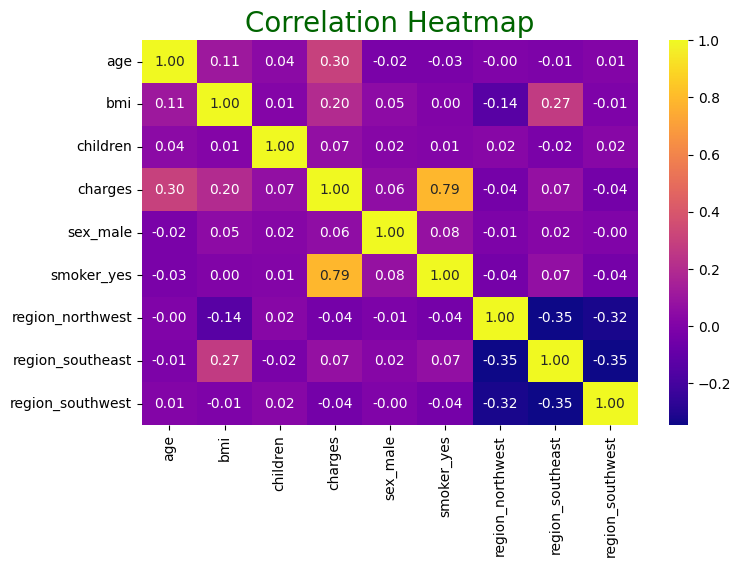

In [11]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='plasma', annot_kws={"size":10})
plt.title('Correlation Heatmap',color='darkgreen', fontsize=20, fontweight=16)
plt.show()

   ## Data Preprocessing

## Encode Categorical Values

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
# Split into features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [14]:
#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  ## Model Training-Linear Regression

In [16]:
model_Lr = LinearRegression()
model_Lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# Make predictions
y_pred = model_Lr.predict(X_test)
y_pred

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673494, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

 ## 📈  Evaluation

In [18]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [19]:
print(f"\nR-squared :{r2: .4f}")
print(f"\nMean Squared Error :{mse: .2f}")
print(f"\nRMSE :{rmse: .2f}")


R-squared : 0.7836

Mean Squared Error : 33596915.85

RMSE : 5796.28


  ## Actual vs Predicted Charges Plot

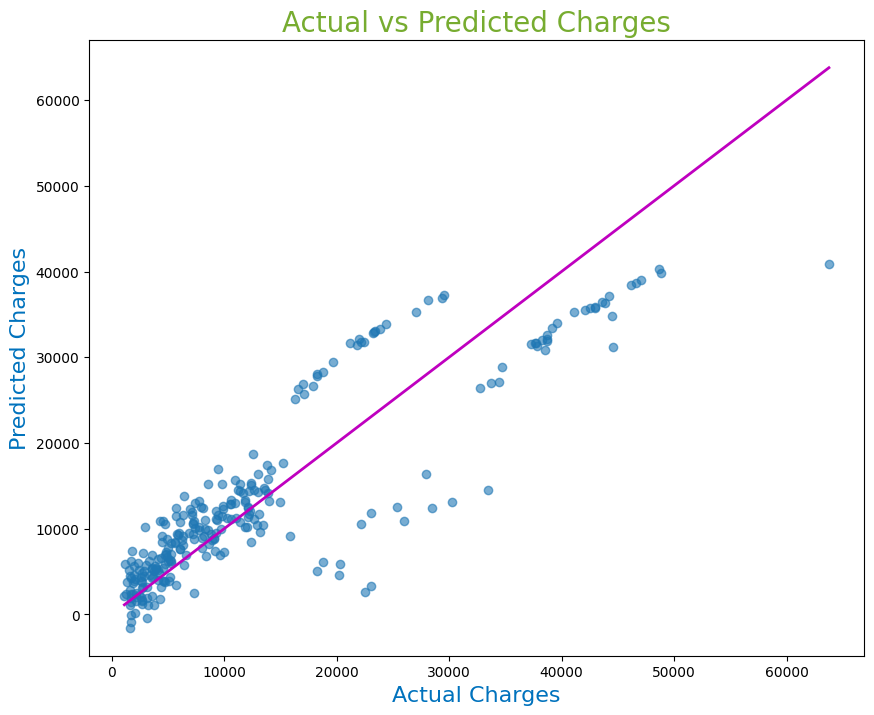

In [20]:
# Plot actual vs predicted charges
plt.figure(figsize=(10, 8))
plt.scatter(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color ='m',lw=2)  # Diagonal line
plt.xlabel('Actual Charges', color = "#0072BD", fontsize=16, fontweight=14)
plt.ylabel('Predicted Charges', color = "#0072BD", fontsize=16, fontweight=14)
plt.title('Actual vs Predicted Charges', color = "#77AC30", fontsize=20, fontweight=16)
plt.show()

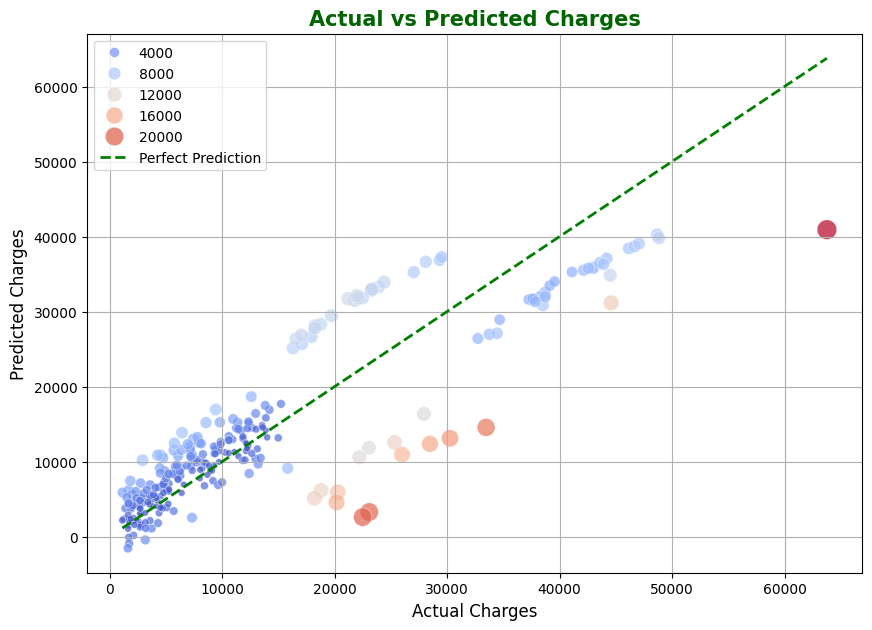

In [23]:
plt.figure(figsize=(10, 7))
# Scatter plot with color and size based on error
error = abs(y_test - y_pred)
sns.scatterplot(x=y_test, y=y_pred, hue=error, size=error, sizes=(20, 200), palette="coolwarm", alpha=0.7, edgecolor="w")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', lw=2, linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Charges", fontsize=12)
plt.ylabel("Predicted Charges", fontsize=12)
plt.title("Actual vs Predicted Charges", fontsize=15, fontweight='bold', color='darkgreen')
plt.legend()
plt.grid(True)
plt.show()


 # Random Forest Regressor

In [25]:
from sklearn.ensemble import  RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
#Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
y_pred_rf = rf_model.predict(X_test)

In [34]:
#Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state = 42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [35]:
y_pred_gb = gb_model.predict(X_test)

 ## Evaluation

In [38]:
print("\nRandom Forest R2:",r2_score(y_test, y_pred_rf))
print("\nGradientBoostRegressor R2:", r2_score(y_test, y_pred_gb))


Random Forest R2: 0.8651034329144947

GradientBoostRegressor R2: 0.8792571359795264


 ### Conclusion
## A Linear Regression model was built to predict medical insurance charges.

## The model captures basic trends but may underperform due to non-linear relationships and interactions.

## Next steps:
   # Try Decision Tree, Random Forest, or Gradient Boosting models for better performance.
   # Perform feature interaction analysis and outlier handling for fine-tuning.